## Часть II. EDA

In [26]:
# загрузим библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split #сплитование выборки
%matplotlib inline
plt.style.use('seaborn')

C:\Users\tani_\AppData\Local\Temp\ipykernel_20004\2223840870.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [27]:
# загрузим очищенные данные
df = pd.read_csv('data/clean_df.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165481 entries, 0 to 165480
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   status                165481 non-null  object 
 1   propertyType          165481 non-null  object 
 2   street                165481 non-null  object 
 3   baths                 165481 non-null  float64
 4   fireplace             165481 non-null  object 
 5   city                  165481 non-null  object 
 6   sqft                  165481 non-null  int64  
 7   zipcode               165481 non-null  int64  
 8   state                 165481 non-null  object 
 9   stories               165481 non-null  float64
 10  target                165481 non-null  int64  
 11  pool                  165481 non-null  object 
 12  school_max_rating     165481 non-null  float64
 13  school_mean_rating    165481 non-null  float64
 14  school_mini_distance  165481 non-null  float64
 15  

Описание данных:
* 'status' — статус продажи;
* 'propertyType' — тип объекта недвижимости;
* 'street' — адрес объекта;
* 'baths' — количество ванных комнат (1 - одна, 2 - две, 3 - три и более, 0 - без указания количества);
* 'fireplace' — наличие камина;
* 'city' — город;
* 'sqft' — площадь в футах;
* 'zipcode' — почтовый индекс;
* 'state' — штат;
* 'stories' — количество этажей;
* 'target' — цена объекта недвижимости (целевой признак, который
необходимо спрогнозировать).
* 'pool' — наличие собственного бассейна;
* 'school_max_rating' — максимальный рейтинг одной из ближайшей школы;
* 'school_mean_rating' — средний рейтинг ближайших школ;
* 'school_mini_distance' — растояние до ближайшей школы;
* 'shcool_mean_distance' — среднее растояние до ближайших школ;
* 'school_names_count' — количесвто находящихся рядом школ;
* 'Year built' — год постройки объекта недвижимости;
* 'Remodeled' — балы ли реконструкция объекта недвижимости;
* 'Heating' — наличие отопления;
* 'Cooling' —  наличие кондиционирования;
* 'Parking' — наличие парковки.

In [28]:
df.head(3)

,status,propertyType,street,baths,fireplace,city,sqft,zipcode,state,stories,...,school_max_rating,school_mean_rating,school_mini_distance,shcool_mean_distance,school_names_count,Year built,Remodeled,Heating,Cooling,Parking
0,sale,family_home,240 heather ln,3.0,Yes,Southern Pines,2900,28387,NC,0.0,...,7.0,5.2,4.0,5.2,8,1997.0,No,Yes,No,No
1,sale,family_home,12911 e heroy ave,3.0,No,Spokane Valley,1947,99216,WA,2.0,...,4.0,1.0,0.0,1.4,3,1980.5,No,No,No,No
2,sale,other,552 casanova ct,0.0,No,Poinciana,1507,34759,FL,1.0,...,3.0,2.3,1.0,2.3,4,1990.0,Yes,Yes,Yes,No


Иследуем данные, чтобы понять слабые и сильные стороны предоставленных данных, определить их достаточность, оценить взаимосвязи между признаками и предложить идеи, как их использовать.

Выводим описательные статистики для числовых и категориальных признаков

In [29]:
# описательные статистики для числовых значений
df.describe()

,baths,sqft,zipcode,stories,target,school_max_rating,school_mean_rating,school_mini_distance,shcool_mean_distance,school_names_count,Year built
count,165481.000000,165481.000000,165481.000000,165481.000000,165481.000000,165481.000000,165481.000000,165481.000000,165481.000000,165481.000000,165481.000000
mean,1.707628,1767.958908,52857.926964,1.039660,269429.002163,6.081526,2.424377,0.905675,2.722934,4.484068,1980.400315
std,1.095441,755.397551,25047.148154,0.915366,115298.333739,1.938449,1.764162,1.706332,1.621213,5.001217,21.393620
min,0.000000,414.000000,1103.000000,0.000000,35600.000000,2.000000,0.500000,0.000000,0.700000,1.000000,1905.000000
25%,1.000000,1204.000000,33071.000000,0.000000,180440.000000,5.000000,1.200000,0.000000,1.600000,3.000000,1980.500000
50%,2.000000,1650.000000,38109.000000,1.000000,263000.000000,6.000000,1.700000,0.000000,2.200000,3.000000,1990.000000
75%,3.000000,2200.000000,77339.000000,2.000000,355000.000000,8.000000,3.300000,1.000000,3.300000,5.000000,1990.000000
max,3.000000,6234.000000,99338.000000,3.000000,500000.000000,9.000000,9.000000,9.000000,9.000000,65.000000,2018.000000


In [30]:
# описательные статистики для категориальных признаков
df.describe(include='object')

,status,propertyType,street,fireplace,city,state,pool,Remodeled,Heating,Cooling,Parking
count,165481,165481,165481,165481,165481,165481,165481,165481,165481,165481,165481
unique,11,10,165016,2,1470,35,2,2,2,2,2
top,sale,family_home,address not disclosed,No,Houston,FL,No,No,Yes,Yes,Yes
freq,157388,96304,196,117430,10755,49169,148040,93500,130791,122627,85407


In [31]:
# cоздадим копию данных для облегчения работы с изменениями в таблице
temp_df = df.copy()

Проведем исследование зависимости целевого признака 'target' от числовых признаков.

In [32]:
# выделим имена числовых признаков в виде списка для удобства дальнейшей работы
# составим список числовых признаков, кроме 'sqft' и 'zipcode' (для этих признаков построим отдельные графики)
types = temp_df.drop(['sqft', 'zipcode'], axis=1).dtypes
num_features = list(types[(types != 'object')].index)
num_features

['baths',
 'stories',
 'target',
 'school_max_rating',
 'school_mean_rating',
 'school_mini_distance',
 'shcool_mean_distance',
 'school_names_count',
 'Year built']

Для каждого числового признака построим гистограмму и диаграмму рассеяния, иллюстрирующую зависимость целевого признака от каждого из факторов. Дополнительно поверх диаграммы рассеяния построим уравнение линейной регрессии. 

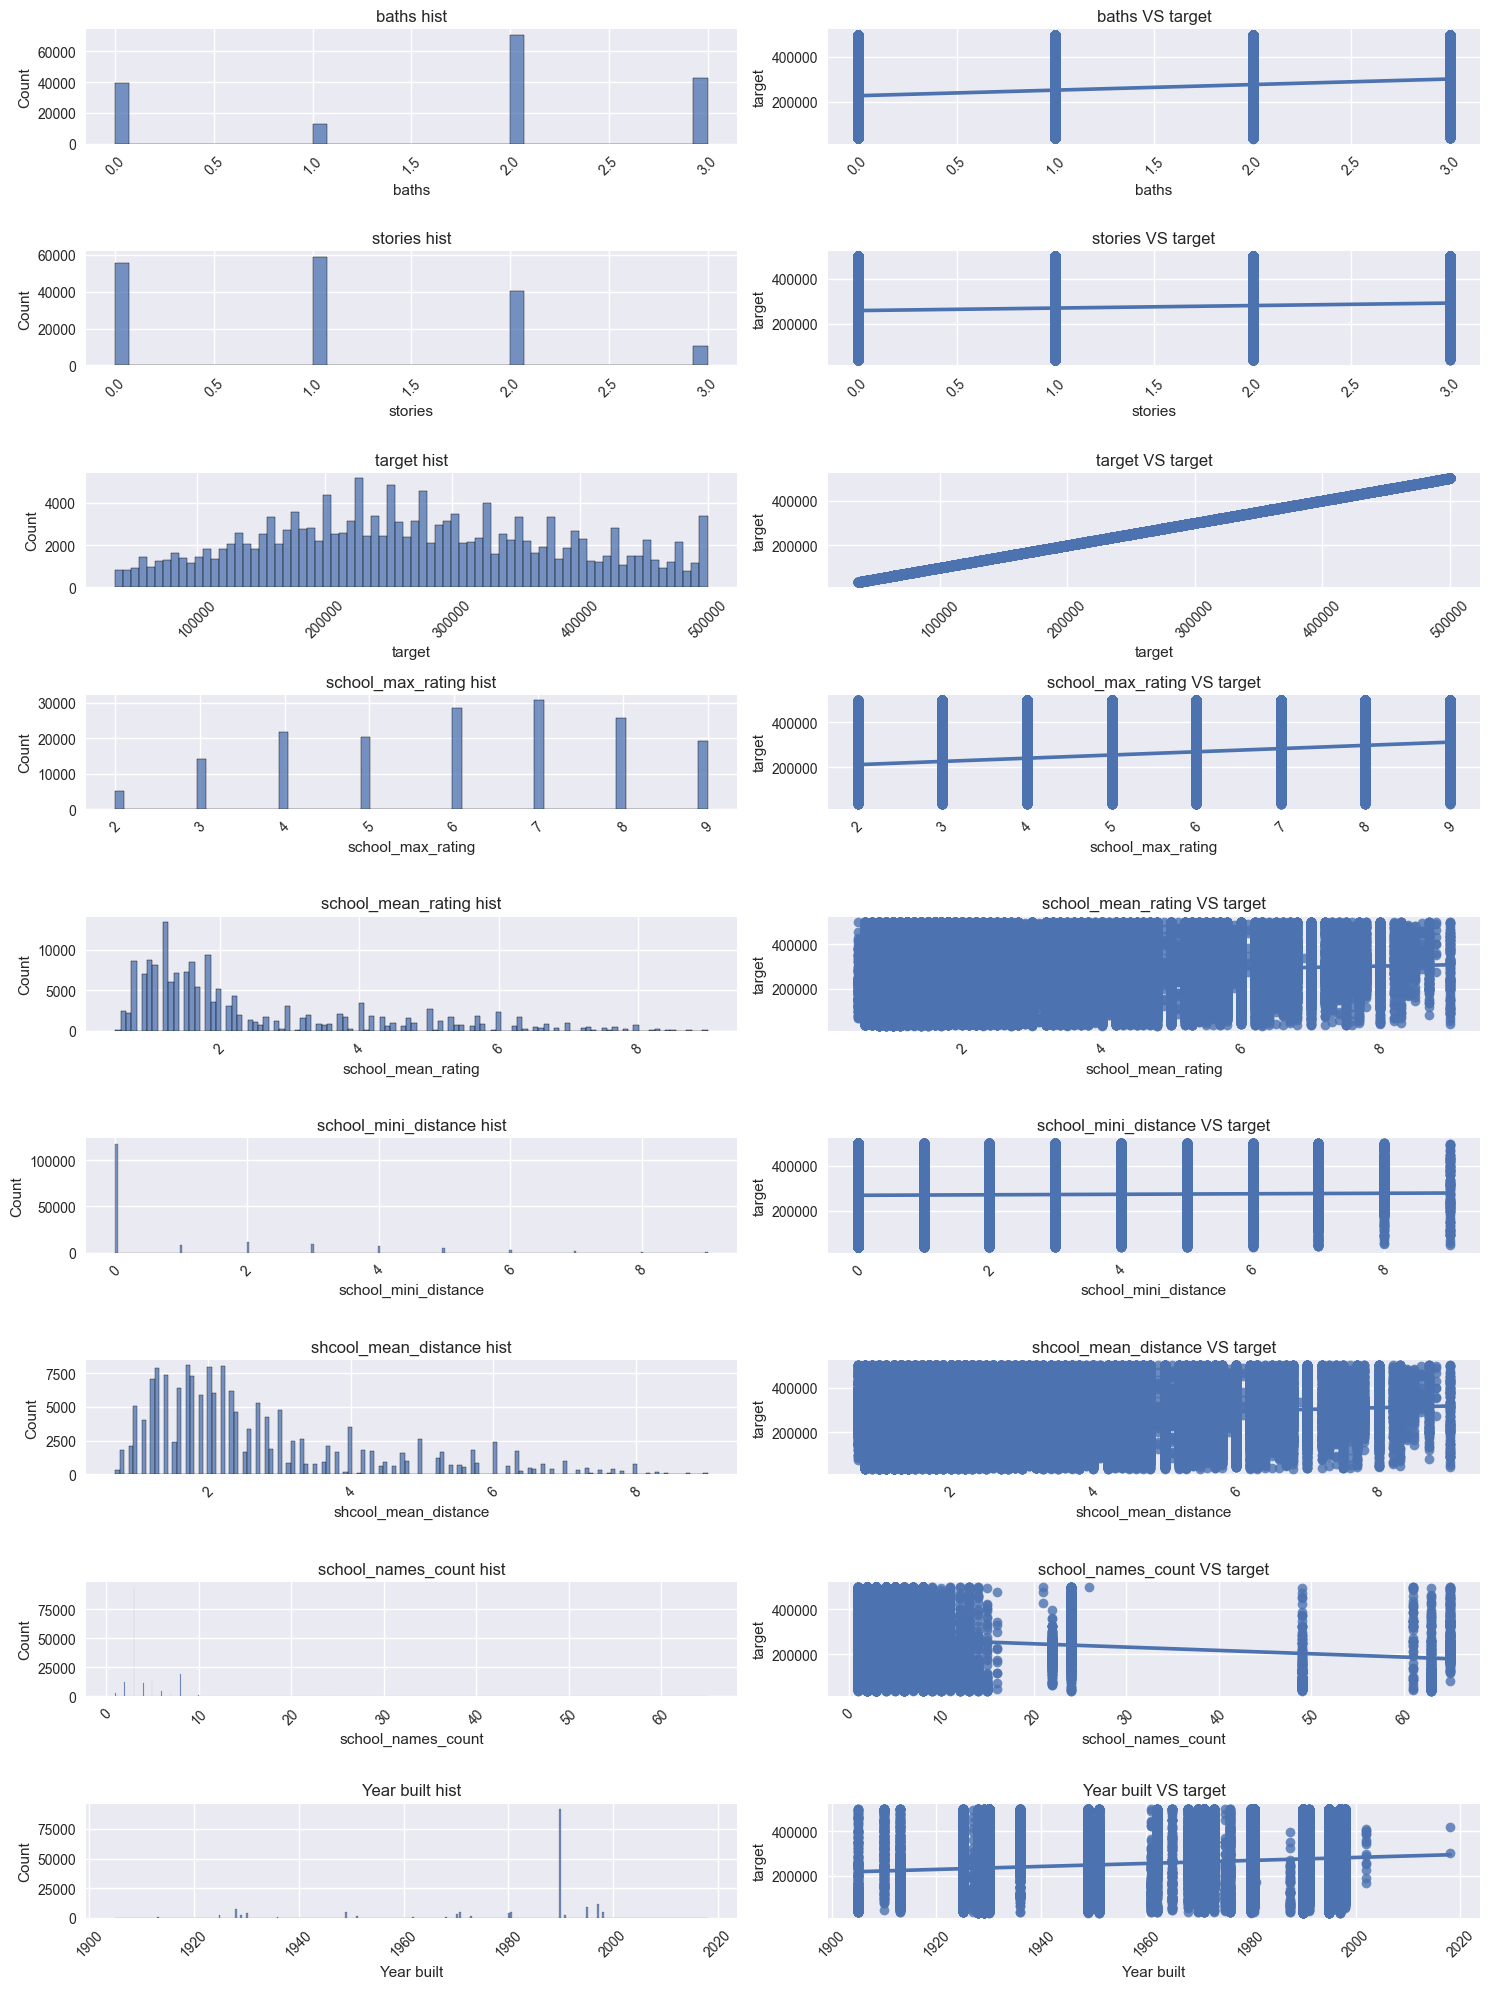

In [33]:
n = len(num_features) #количество числовых признаков
fig, axes = plt.subplots(n, 2, figsize=(15, 20)) # фигура + n х 2 координатных плоскостей
#Создаем цикл для всех признаков из списка числовых признаков
for i, target in enumerate(num_features): #i- индекс, feature - название признака в таблице
    #Строим гистограмму распределения признака 
    histplot = sns.histplot(data=temp_df, x=target, ax=axes[i][0])
    #Добавляем подпись графику
    histplot.set_title('{} hist'.format(target))
    #Добавляем поворот отметок на оси абсцисс
    histplot.xaxis.set_tick_params(rotation=45)
    #Строим диаграмму рассеяния + линейную регрессию
    regplot = sns.regplot(data=temp_df, x=target, y='target', ax=axes[i][1])
    #Добавляем подпись графику
    regplot.set_title('{} VS target'.format(target));
    #Добавляем поворот отметок на оси абсцисс
    regplot.xaxis.set_tick_params(rotation=45)
plt.tight_layout() #выравнивание графиков

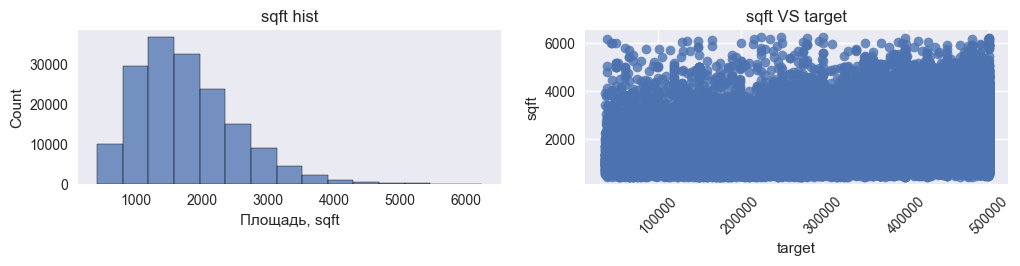

In [34]:
# диаграмма и график рассеяния для признака 'sqft'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 2))
plt.subplots_adjust(hspace=0)

# Построение диаграммы
histplot1 = sns.histplot(
    data=temp_df,
    x='sqft',
    kde=False,
    bins=15,
    ax=axes[0],
)

histplot1.grid()
histplot1.set_title('sqft hist')
histplot1.set_xlabel('Площадь, sqft')
histplot1.set_ylabel('Count')

# Построение графика рассеяния
regplot = sns.regplot(
    data=temp_df, 
    x='target', 
    y='sqft',
    ax=axes[1],
)

regplot.set_title('sqft VS target'.format(target));
regplot.xaxis.set_tick_params(rotation=45)

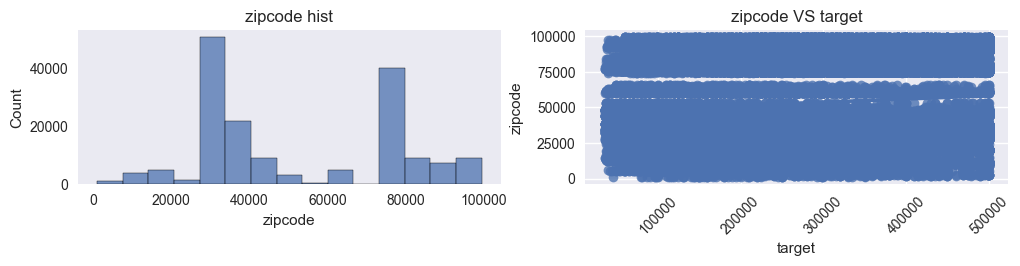

In [35]:
# диаграмма и график рассеяния для признака 'zipcode'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 2))
plt.subplots_adjust(hspace=0)

# Построение диаграммы
histplot1 = sns.histplot(
    data=temp_df,
    x='zipcode',
    kde=False,
    bins=15,
    ax=axes[0],
)

histplot1.grid()
histplot1.set_title('zipcode hist')
histplot1.set_xlabel('zipcode')
histplot1.set_ylabel('Count')

# Построение графика рассеяния
regplot = sns.regplot(
    data=temp_df, 
    x='target', 
    y='zipcode',
    ax=axes[1],
)

regplot.set_title('zipcode VS target'.format(target));
regplot.xaxis.set_tick_params(rotation=45)

Выводы на основе графиков колличественных признаков:
1. Ванные ('baths'). В основном объекты недвижимости имеют 2 ванные комнаты. При увеличении количества ванных комнат цена объекта увеличивается.
2. Этажность здания, в котором находится объект недвижимости ('stories'). Наибольшее количество объектов имеет 1 этаж. При увеличении этажности здания, цена объекта незначительно увеличивается.
3. Цена ('target'). Наибольшее количество объектов - это объекты с ценой от 200 тыс.  до 300 тыс. долларов.
4. Максимальный рейтинг ближайших школ ('school_max_rating'). Наибольшее количесвто школ - это школы с рейтингом от 6 до 8 баллов из 10. При увеличение рейтинга школы, увеличивается цена объекта недвижимости.
5. Средний рейтинг ближайших школ ('school_mean_rating'). Средний рейтинг школ не дает полезной для нас информации, касаемой взаимосвязи с ценой объекта. Но по графику среднего рейтинга школ хорошо видна взаимосвязь со средней дистанцией до школы. Это говорит о том, что рейтинг школы напрямую зависит от расположения школ вблизи объектов недвижимости.
6. Дистанция до ближайшей школы ('school_mini_distance'). Большинство объектов недвижимости находятся близко со школами. Но маленькое растояние до ближайшей школы не влияет на цену объектов недвижимости.
7. Средняя дистанция до ближайших школ ('shcool_mean_distance'). Средняя дистанция до ближайших школ не дает полезной для нас информации, касаемой взаимосвязи с ценой объекта.
8. Количесвто находящихся рядом школ ('school_names_count'). Наибольшее количество объектов имеет рядом с собой в приделах 4 школ. По графику рассеивания мы видим, что чем больше школ, тем цена на недвижимость ниже.
9. Год строительства объекта недвижимости ('Year built'). Большинство объектов построено в 1990 году. С  уменьшением возраста объекта цена недвижимости увеличивается.
10. Площадь объекта недвижимости ('sqft). Основная часть объектов имеет площаль в приделах 2000 кв.футов. С увеличением площади цена незначительно увеличивается.
11. Почтовый индекс ('zipcode'). Так как почтовые индексы в США имеют номерацию с запада на восток, то по графику мы видим, что самая большая группа объектов недвижимости находится на юго-востоке США, а вторая по численности группа находится не доходя до побережья Тихого океана на западе.

Проведем исследование зависимости целевого признака 'target' от категориальных признаков.

In [36]:
# составим список категориальных признаков, кроме 'sity', 'street'
types = temp_df.drop(['city', 'street'], axis=1).dtypes
cat_features = list(types[(types == 'object')].index)
cat_features

['status',
 'propertyType',
 'fireplace',
 'state',
 'pool',
 'Remodeled',
 'Heating',
 'Cooling',
 'Parking']

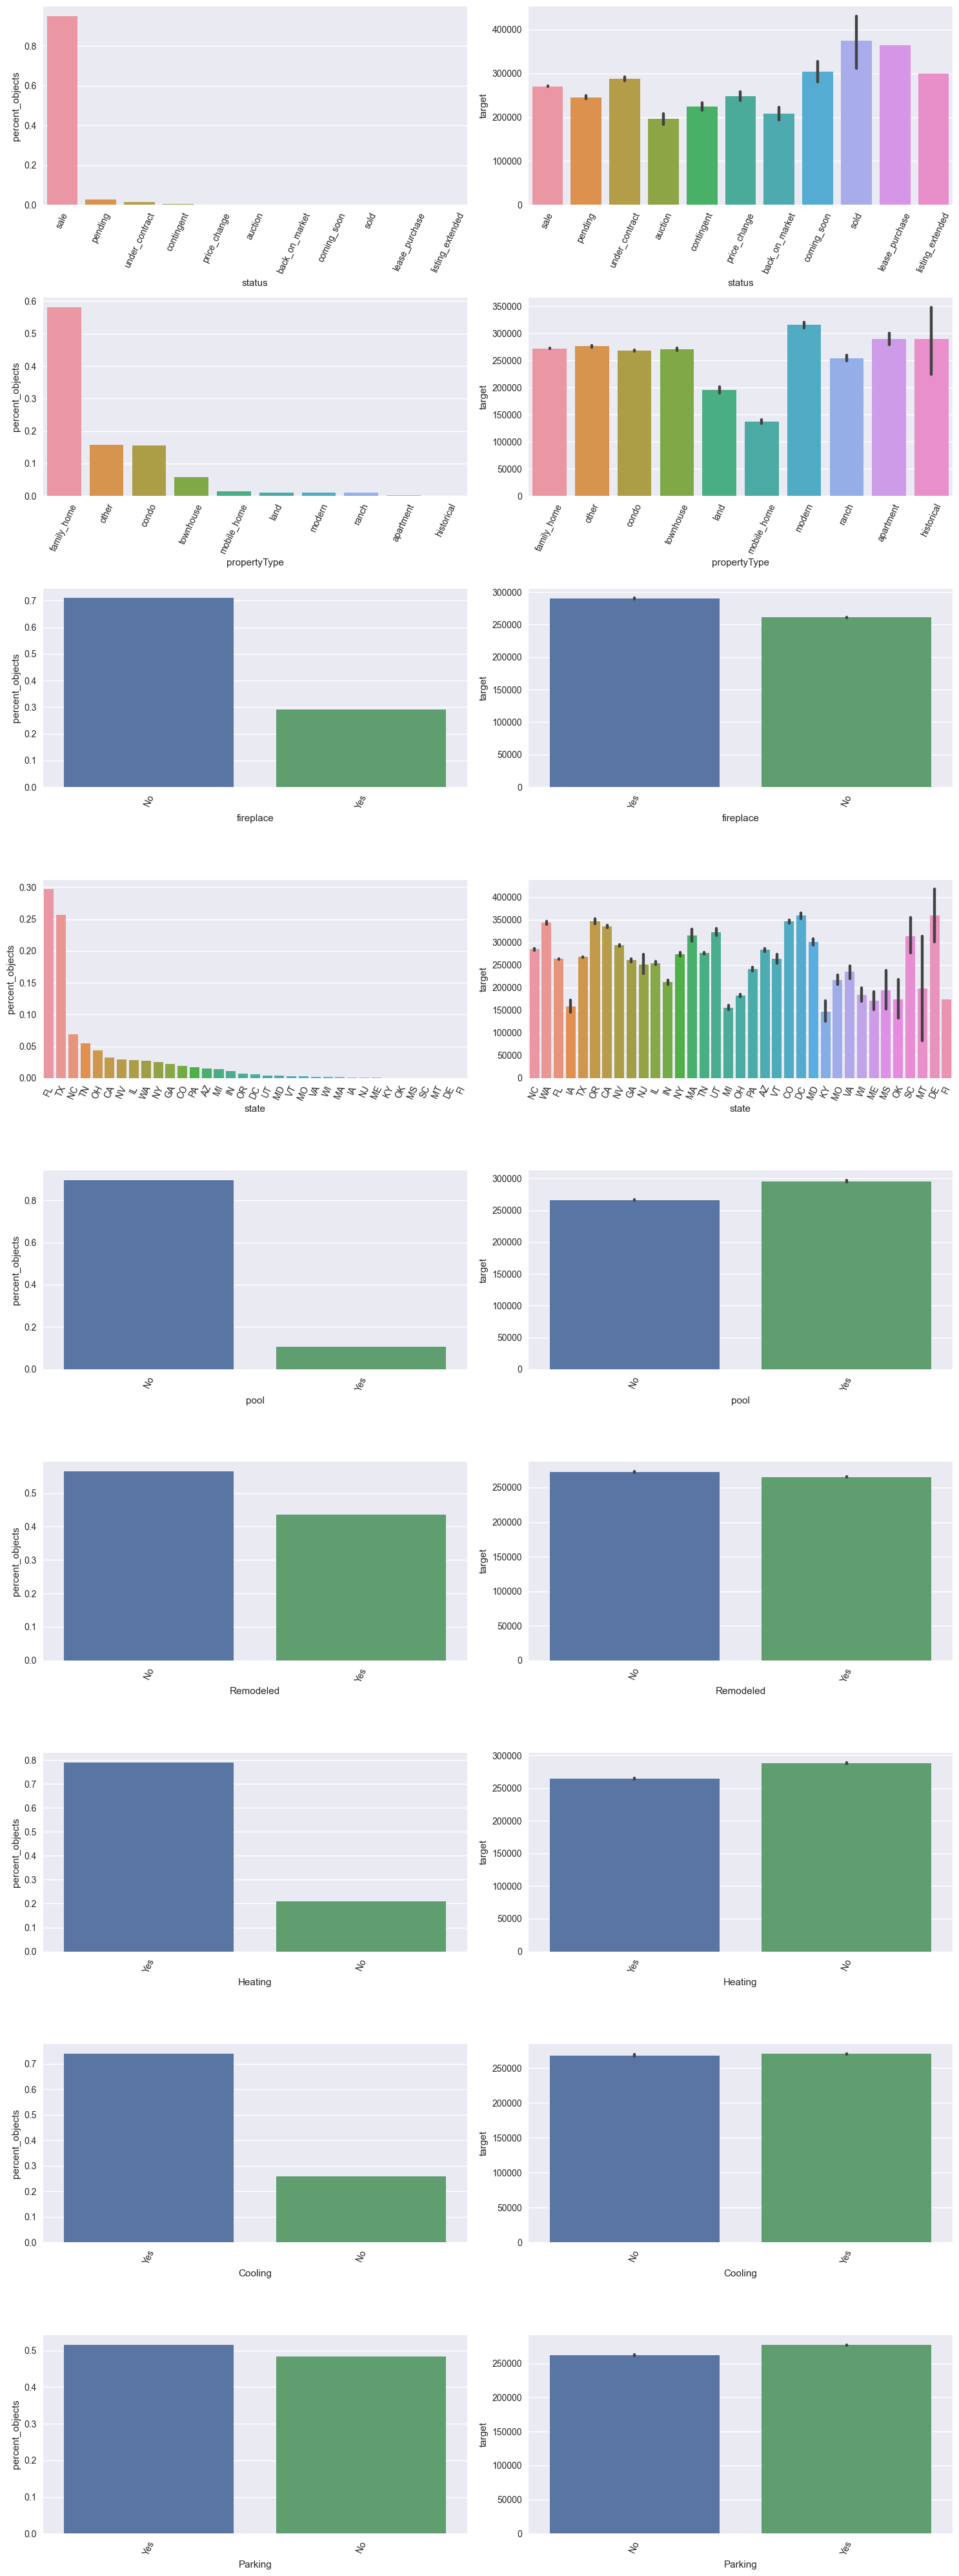

In [37]:
n = len(cat_features) #число категориальных признаков
fig, axes = plt.subplots(n, 2, figsize=(15, 40)) #фигура+n*2 координатных плоскостей
#Создаем цикл для всех признаков из списка категориальных признаков
for i, feature in enumerate(cat_features):
    #Строим количественную столбчатую для долевого соотношения каждой из категорий в данных
    count_data = (temp_df[feature].value_counts(normalize=True)
                  .sort_values(ascending=False)
                  .rename('percent_objects')
                  .reset_index())
    count_barplot = sns.barplot(data=count_data, x=feature, y='percent_objects', ax=axes[i][0])
    count_barplot.xaxis.set_tick_params(rotation=65)
    #Строим столбчатую диаграмму доли объектов недвижимости в зависимости от категории
    mean_barplot = sns.barplot(data=temp_df, x=feature, y='target', ax=axes[i][1])
    mean_barplot.xaxis.set_tick_params(rotation=65)
plt.tight_layout() #выравнивание графиков

Выводы на основе графиков категориальных признаков:
1. Статус объекта недвижимости ('status'). Наибольшее количество объектов имеют статус проданных. Наибольшую цену имеют объекты со статусом 'closed'.
2. Тип объекта ('propertyType'). Более половины объектов в базе - это семейные дома. Кроме таких типов объектов, как 'land' и 'mobile_home' цены на объекты недвижимости в среднем доходят до 250-300 тысяч долларов.
3. Камин ('fireplace'). В 70% объектах недвижимости камин отсутствует. Но наличие камина делает объект немного дороже.
4. Штат ('state').
5. Бассейн ('pool'). В 90% объектах недвижимости бассейн отсутствует. Наличие бассейна делает объект немного дороже.
6. Реконструкция ('Remodeled'). Объектов после реконструкции немного меньше. Наличие реконструкции немного увеличивает цену.
7. Отопление ('Heating'). В 20% объектах недвижимости отопление отсутствует. Отсутствие отопление делает объект немного дешевле.
8. Кондиционирование ('Cooling'). В 30% объектах недвижимости кондиционирование отсутствует. Наличие кондиционирования делает объект немного дороже.
9. Парковка ('Parking'). Объектов с парковочными месами немного больше, чем без таковых. Это делает объект недвижимости немного дороже.
10. Город ('sity').

Построим тепловую карту для корреляционной матрицы, чтобы оценить мультиколлинеарную зависимость и линейную взаимосвязь между факторами и целевым признаком ('target')

<Axes: >

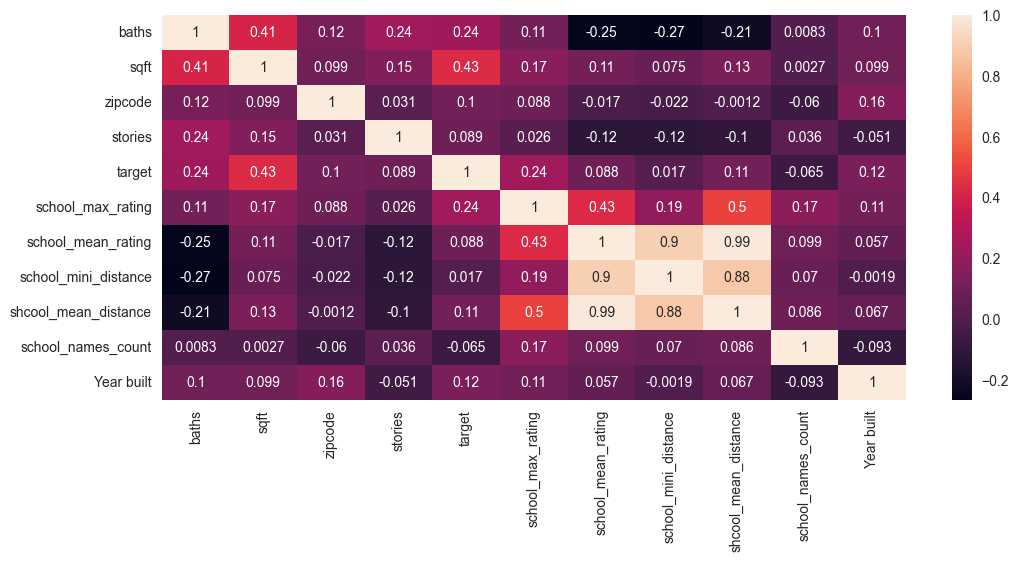

In [38]:
#строим тепловую карту корреляций
fig = plt.figure(figsize=(12, 5))
map_data = temp_df.select_dtypes(exclude=['object'])
sns.heatmap(map_data.corr(), annot=True)

Выводы:

Согласно тепловой карте мы видим, что признаки 'school_max_rating' и 'school_mean_rating' очень коррелируют друг с другом. Так как 'school_max_rating' больше коррелирует с целевым признаком 'target', то признак 'school_mean_rating' удаляем. 

Также сильно коррелируют друг с другом признаки дистанции 'school_mini_distance' и 'school_mean_distance'. Удаляем 'school_mini_distance', так как это признак меньше коррелирует с 'target'. 

Так как признак количесвто школ ('school_names_count') практически не влияет на признак 'target', то тоже удалим его.

Признак этажности здания ('stories') тоже очень слабо влияет на признак 'target'. Этот признак мы тоже удаляем.

In [39]:
# удаление признаков 'school_mean_rating', 'school_mini_distance', 'school_names_count', 'stories'
temp_df = temp_df.drop(['school_mean_rating', 'school_mini_distance', 'school_names_count', 'stories'],  axis=1)

### Подготовка данных

Подготовим обучающую выборку для использования в моделировании.

In [40]:
r_scaler = preprocessing.RobustScaler()
for column in ['baths', 'sqft', 'target', 'school_max_rating', 'shcool_mean_distance']:
    temp_df[column] = r_scaler.fit_transform(temp_df[[column]])[:,0]

In [41]:
temp_df.describe()

,baths,sqft,zipcode,target,school_max_rating,shcool_mean_distance,Year built
count,165481.000000,165481.000000,165481.000000,165481.000000,165481.000000,165481.000000,165481.000000
mean,-0.146186,0.118433,52857.926964,0.036830,0.027175,0.307608,1980.400315
std,0.547720,0.758431,25047.148154,0.660508,0.646150,0.953655,21.393620
min,-1.000000,-1.240964,1103.000000,-1.302704,-1.333333,-0.882353,1905.000000
25%,-0.500000,-0.447791,33071.000000,-0.472961,-0.333333,-0.352941,1980.500000
50%,0.000000,0.000000,38109.000000,0.000000,0.000000,0.000000,1990.000000
75%,0.500000,0.552209,77339.000000,0.527039,0.666667,0.647059,1990.000000
max,0.500000,4.602410,99338.000000,1.357699,1.000000,4.000000,2018.000000


Линейная регрессия, которую мы будем использовать, является моделью, которая требует численного представления данных. То есть на этапе подготовки данных мы должны позаботиться о кодировании текстовых категориальных признаков. 

Произведем кодирование признаков. 

Произведем порядковое кодирование для таких признаков как:

* 'fireplace' — наличие камина;
* 'pool' — наличие собственного бассейна;
* 'Remodeled' — балf ли реконструкция объекта недвижимости;
* 'Heating' — наличие отопления;
* 'Cooling' —  наличие кондиционирования;
* 'Parking' — наличие парковки.

Но мы не будем создавать новые признаки, а заменим значение 'Yes' на 1 и 'No' на 0.

In [42]:
# замена значение 'Yes' на 1 и 'No' на 0
temp_df['fireplace'] = temp_df['fireplace'].apply(lambda x: 1 if x == 'Yes' else 0)
temp_df['pool'] = temp_df['pool'].apply(lambda x: 1 if x == 'Yes' else 0)
temp_df['Remodeled'] = temp_df['Remodeled'].apply(lambda x: 1 if x == 'Yes' else 0)
temp_df['Heating'] = temp_df['Heating'].apply(lambda x: 1 if x == 'Yes' else 0)
temp_df['Cooling'] = temp_df['Cooling'].apply(lambda x: 1 if x == 'Yes' else 0)
temp_df['Parking'] = temp_df['Parking'].apply(lambda x: 1 if x == 'Yes' else 0)

В наших данных есть категориальные признаки:
* 'status' — статус продажи;
* 'propertyType' — тип объекта недвижимости;
* 'state' — штат;
* 'city' — город.

Признак 'street' удалим, так как слишком много уникальных значений.

In [43]:
# в зависимости от количества уникальных значений в признаках Label Encoder (>15) или One Hot Encoder (<=15)
print(f'Количество уникальных значений признака "Статус продажи":',temp_df['status'].nunique())
print(f'Количество уникальных значений признака "Тип объекта недвижимости":',temp_df['propertyType'].nunique())
print(f'Количество уникальных значений признака "Штат":',temp_df['state'].nunique())
print(f'Количество уникальных значений признака "Город":',temp_df['city'].nunique())

Количество уникальных значений признака "Статус продажи": 11
Количество уникальных значений признака "Тип объекта недвижимости": 10
Количество уникальных значений признака "Штат": 35
Количество уникальных значений признака "Город": 1470


Проведем кодирование признаков 'state' и 'city'

In [44]:
le = LabelEncoder()
temp_df['state'] = le.fit_transform(temp_df['state'])
temp_df['city'] = le.fit_transform(temp_df['city'])

In [45]:
temp_df['zipcode'] = le.fit_transform(temp_df['zipcode'])
temp_df['Year built'] = le.fit_transform(temp_df['Year built'])

In [46]:
# удаление признака 'street'
temp_df = temp_df.drop(['street'], axis=1)

In [47]:
#Производим кодирование категориальных признаков
dummies_data = pd.get_dummies(temp_df)
dummies_data.head()

,baths,fireplace,city,sqft,zipcode,state,target,pool,school_max_rating,shcool_mean_distance,...,propertyType_apartment,propertyType_condo,propertyType_family_home,propertyType_historical,propertyType_land,propertyType_mobile_home,propertyType_modern,propertyType_other,propertyType_ranch,propertyType_townhouse
0,0.5,1,1229,1.255020,778,19,0.887947,0,0.333333,1.764706,...,False,False,True,False,False,False,False,False,False,False
1,0.5,0,1236,0.298193,3760,33,0.269248,0,-0.666667,-0.470588,...,False,False,True,False,False,False,False,False,False,False
2,-1.0,0,1018,-0.143574,1323,5,-0.466888,0,-1.000000,0.058824,...,False,False,False,False,False,False,False,True,False,False
3,0.0,0,781,1.945783,1937,8,-0.103689,0,0.333333,0.941176,...,False,False,True,False,False,False,False,False,False,False
4,-1.0,0,591,1.485944,2418,29,-0.017186,0,0.000000,1.176471,...,False,False,False,False,False,False,False,True,False,False


<Axes: >

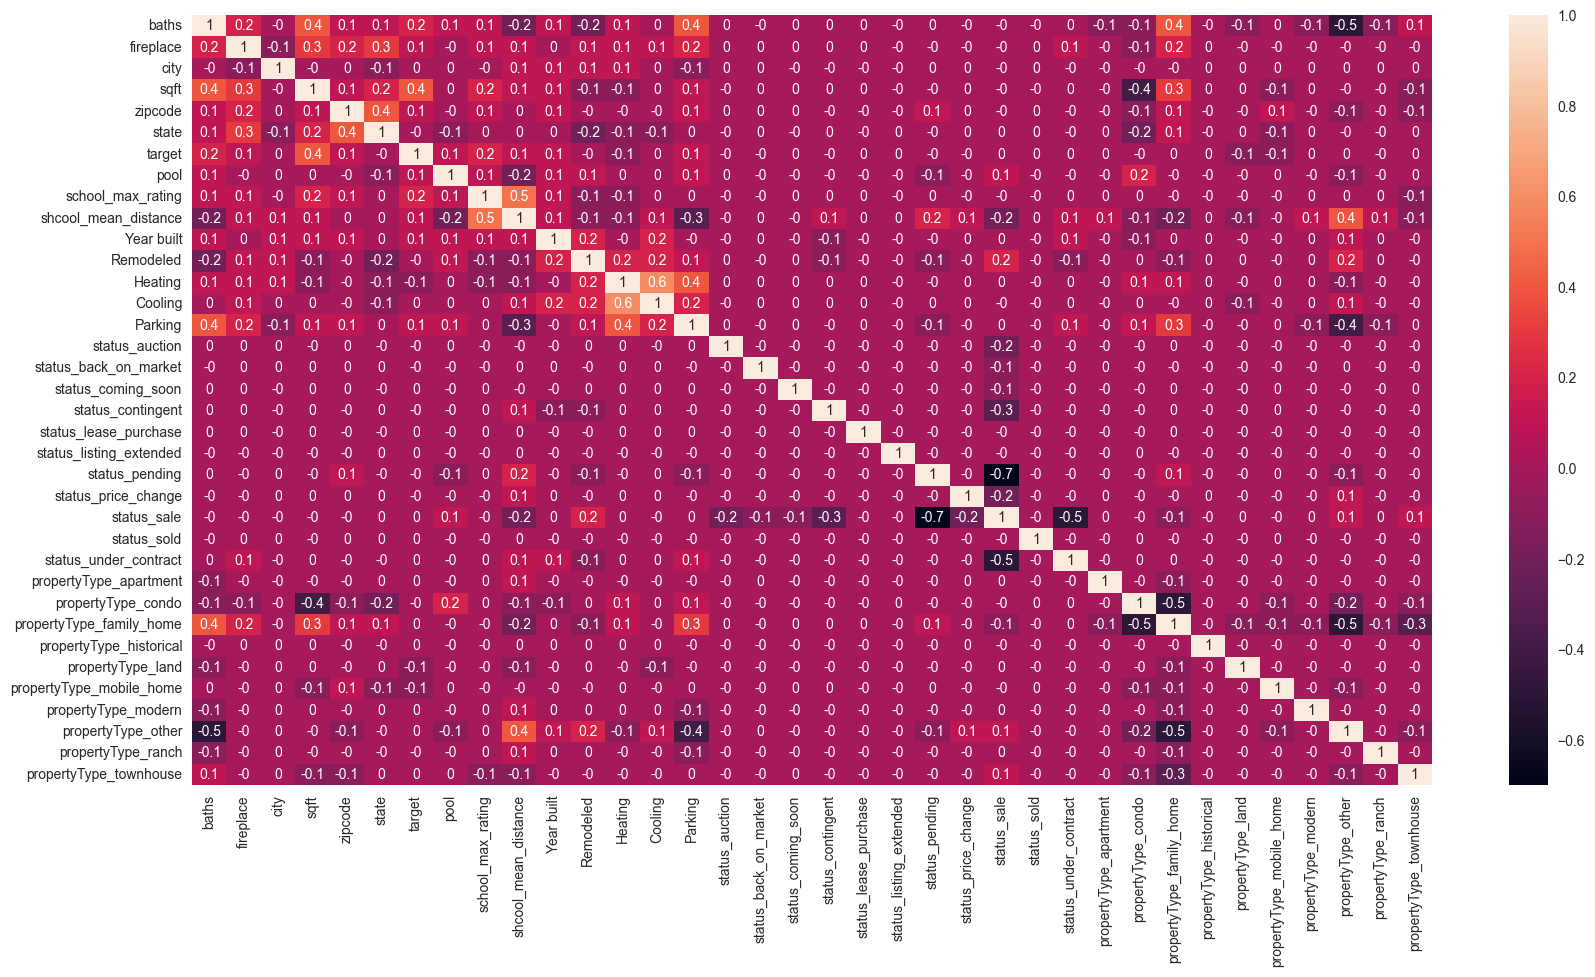

In [48]:
#строим тепловую карту корреляций
fig = plt.figure(figsize=(20,10))
map_data = dummies_data.select_dtypes(exclude=['object'])
sns.heatmap(round(map_data.corr(),1), annot=True)

Удалим признаки статуса недвижимости 'status_pending', так как коэффициент корреляции -0.7, то это приводит к мультиколлинеарности.

In [49]:
# удаление признака 'status_pending'
dummies_data = dummies_data.drop(['status_pending'], axis=1)

In [50]:
# Сохраним полученный датафрейм в CSV-файл
dummies_data.to_csv("data/norm_df.csv", index=False)